# Introduction

This project focuses on predicting house prices in King County, USA. It involves extensive data transformation and cleaning processes, along with experimenting with various models to identify the most effective one for accurate predictions. The project also explores multiple approaches to deepen understanding and improve the prediction outcomes.

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housesalesprediction/kc_house_data.csv


In [3]:
housing = pd.read_csv("/kaggle/input/housesalesprediction/kc_house_data.csv")

In [4]:
housing.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
housing.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Make histograms for all the columns where number of instances on the vertical axis and values of the columns on the horizontal axis

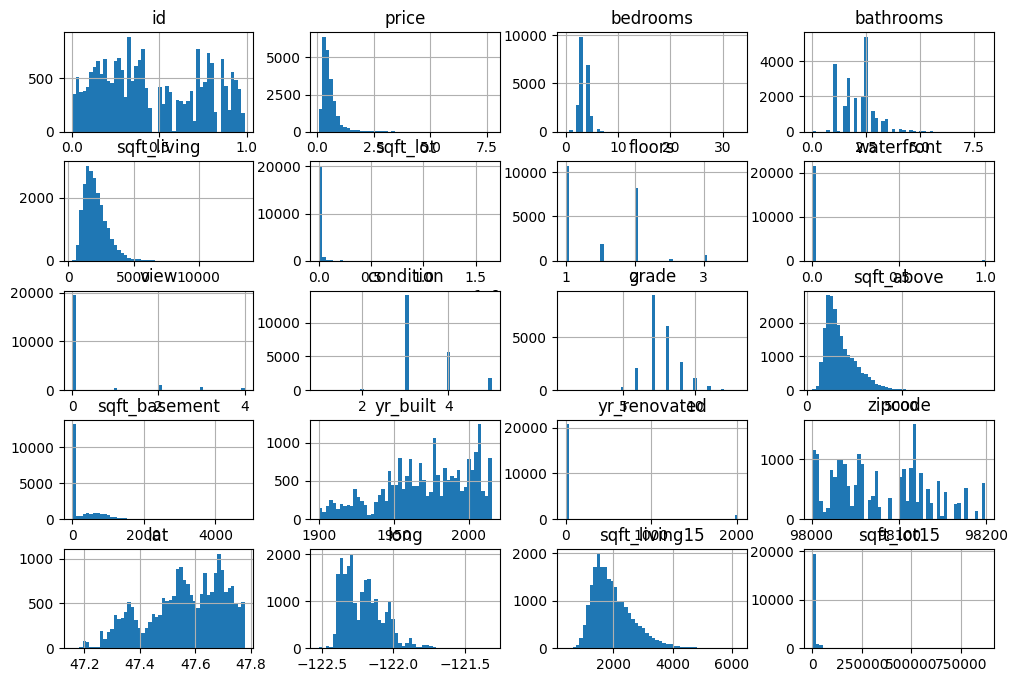

In [7]:
import matplotlib.pyplot as plt

housing.hist(bins = 50, figsize = (12,8))
plt.show()

# Create Training and Test Set

1. shuffle_and_split_data function

In [8]:
def shuffle_and_split_data(data,test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    Test_Indices = shuffled_indices[:test_set_size]
    Train_Indices = shuffled_indices[test_set_size:]
    return data.iloc[Train_Indices],data.iloc[Test_Indices]

In [9]:
train_set,test_set = shuffle_and_split_data(housing,0.2)

2.Use ids as hash or refrences to split in to training and test set to store same kind of data everytime we go through this code.

In [10]:
from zlib import crc32

def is_id_in_test_set(identifier,test_ratio):
    return crc32(np.int64(identifier))<test_ratio*2**32
def split_data_with_id_hash(data,test_ratio,ids_column):
    ids = data[ids_column]
    in_test_set = ids.apply(lambda id_ : is_id_in_test_set(id_,test_ratio))
    in_test_set = in_test_set.astype(bool)
    return data.loc[~in_test_set],data.loc[in_test_set]

In [11]:
train_set,test_set = split_data_with_id_hash(housing,0.2,'id')

In [12]:
per_train_set = train_set.shape[0]/housing.shape[0]*100
per_test_set = test_set.shape[0]/housing.shape[0]*100
print(f"{per_train_set:.2f}%")
print(f"{per_test_set:.2f}%")

79.48%
20.52%


3. By using train_test_split

In [13]:
from sklearn.model_selection import train_test_split

train_set,test_set = train_test_split(housing,test_size = 0.2,random_state =442)

In [14]:
per_train_set = train_set.shape[0]/housing.shape[0]*100
per_test_set = test_set.shape[0]/housing.shape[0]*100
print(f"{per_train_set:.2f}%")
print(f"{per_test_set:.2f}%")

80.00%
20.00%


4. Stratified Shuffle Split

For this we have to look for an element in the data which could be very helpful in predicting housing prices like the grade which housing inspectors gives it. We will divide it's values in to categories and then based on that we will assign values in train and test set where the values adjusted in these sets are true representatives of the population and will reduce the sampling bias.

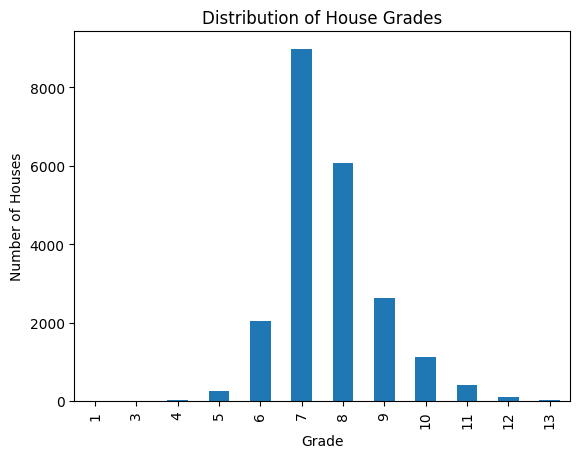

In [15]:
# Get the value counts and sort by the grade index
grade_counts = housing["grade"].value_counts().sort_index()

# Plotting
grade_counts.plot(kind="bar")
plt.xlabel("Grade")
plt.ylabel("Number of Houses")
plt.title("Distribution of House Grades")
plt.show()

In [16]:
housing["grade_cat"] = pd.cut(housing["grade"],bins =[1, 4, 7, 10, 13, np.inf],labels = [1,2,3,4,5])

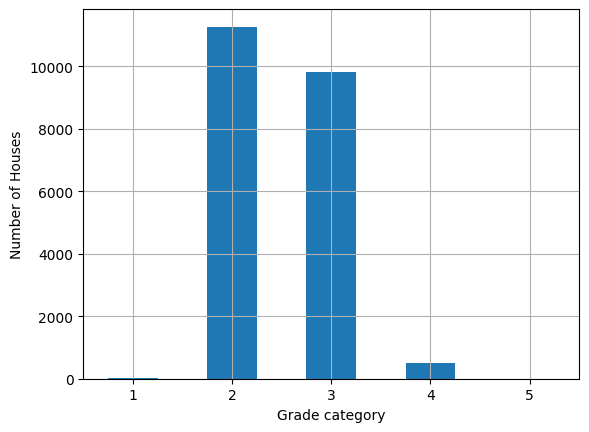

In [17]:
housing["grade_cat"].value_counts().sort_index().plot.bar(rot =0, grid = True)
plt.xlabel("Grade category")
plt.ylabel("Number of Houses")
plt.show()

In [18]:
from sklearn.model_selection import StratifiedShuffleSplit

housing_cleaned = housing.dropna(subset=["grade_cat"])
splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []

for train_index, test_index in splitter.split(housing_cleaned, housing_cleaned["grade_cat"]):
    strat_train_set_n = housing_cleaned.iloc[train_index]
    strat_test_set_n = housing_cleaned.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

Due to applying split mehtod there are different splits of training and test data sets so we can use the first one.

In [19]:
train_set,test_set = strat_splits[0]

In [20]:
per_train_set = train_set.shape[0]/housing.shape[0]*100
per_test_set = test_set.shape[0]/housing.shape[0]*100
print(f"{per_train_set:.2f}%")
print(f"{per_test_set:.2f}%")

79.99%
20.00%


**Another way of doing stratified sampling**

In [21]:
 train_set,test_set = train_test_split(
housing_cleaned, test_size=0.2, stratify=housing_cleaned["grade_cat"], random_state=42)

In [22]:
per_train_set = train_set.shape[0]/housing.shape[0]*100
per_test_set = test_set.shape[0]/housing.shape[0]*100
print(f"{per_train_set:.2f}%")
print(f"{per_test_set:.2f}%")

79.99%
20.00%


In [23]:
test_set["grade_cat"].value_counts()/len(test_set)

grade_cat
2    0.521166
3    0.454314
4    0.023132
1    0.001388
5    0.000000
Name: count, dtype: float64

You won’t use the income_cat column again, so you might as well drop it,
reverting the data back to its original state:

In [24]:
for set_ in (train_set,test_set):
 set_.drop("grade_cat", axis=1, inplace=True)

# See and Visualize the data to gain insights

In [25]:
housing = train_set.copy()

Since you’re going to experiment with various
transformations of the full training set, you should make a copy of the
original so you can revert to it afterwards:


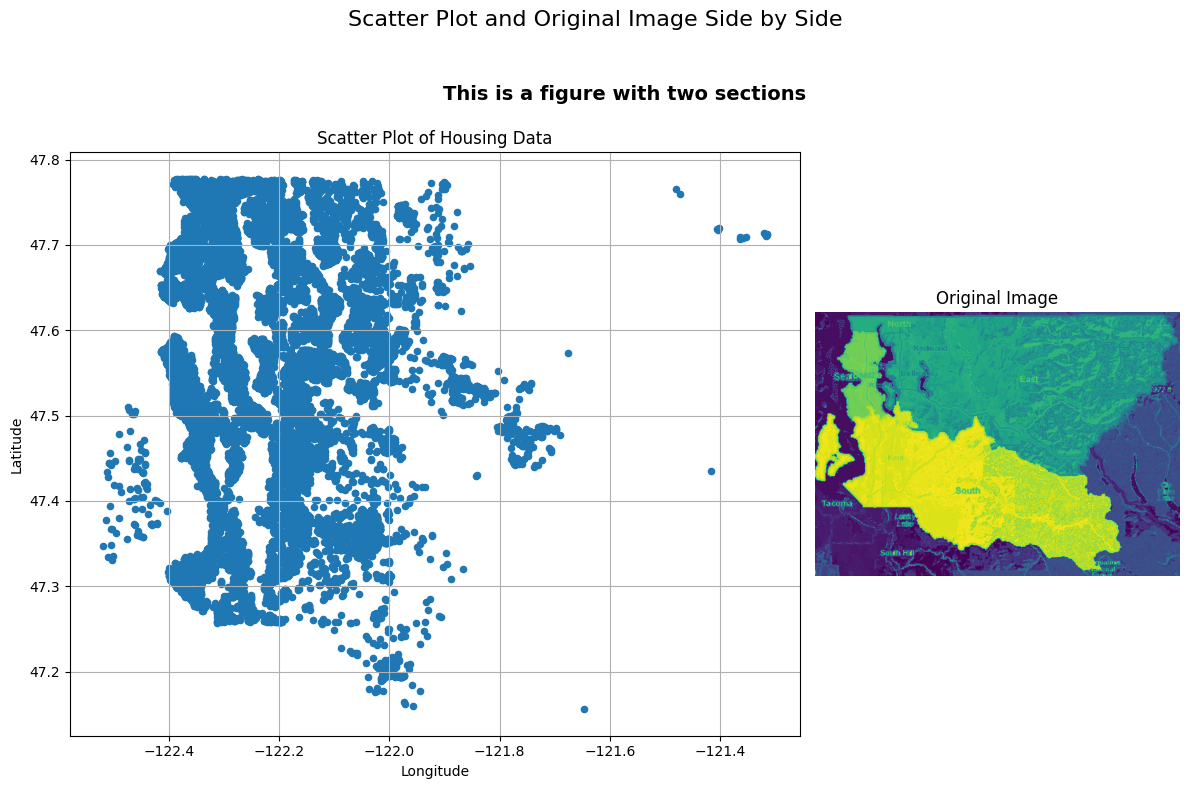

In [26]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.image as mpimg
import urllib.request
from PIL import Image
import numpy as np

# Load your image from URL
url = "https://images.squarespace-cdn.com/content/v1/5bf9022b5cfd79f62c905004/1609870717560-TI9F0J5T71BOX54O6F9D/Geography-Region.png"
with urllib.request.urlopen(url) as response:
    img = Image.open(response)
    img = np.array(img)  # Convert the image to a numpy array for matplotlib

# Create a GridSpec with 2 columns, keeping the heights of both plots consistent
fig = plt.figure(figsize=(12, 8))
gs = gridspec.GridSpec(2, 2, width_ratios=[2, 1], height_ratios=[0.1, 2])

# Title for the whole figure
fig.suptitle("Scatter Plot and Original Image Side by Side", fontsize=16)

# Add title section (1st row, full width)
ax_title = plt.subplot(gs[0, :])
ax_title.text(0.5, 0.5, "This is a figure with two sections", ha='center', fontsize=14, weight='bold')
ax_title.axis('off')  # Hide the axes for the title section

# Scatter plot in the first subplot (2nd row, 1st column)
ax0 = plt.subplot(gs[1, 0])
housing.plot(kind="scatter", x="long", y="lat", grid=True, ax=ax0)
ax0.set_xlabel("Longitude")
ax0.set_ylabel("Latitude")
ax0.set_title("Scatter Plot of Housing Data")

# Image in the second subplot (2nd row, 2nd column)
ax1 = plt.subplot(gs[1, 1])
ax1.imshow(img)
ax1.set_title("Original Image")
ax1.axis('off')  # Hide the axes

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for the suptitle
plt.show()


In below figure red is expensive, blue is cheap, larger circles indicate areas
with a larger size of the house

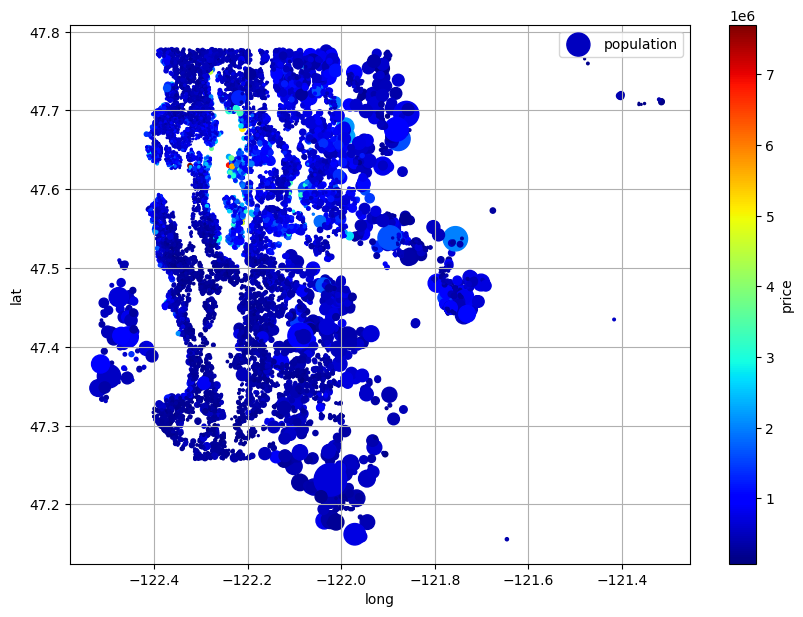

In [27]:
housing.plot(kind="scatter", x="long", y="lat", grid=True,
s=housing["sqft_lot"] / 3000, label="population",
c="price", cmap="jet", colorbar=True,
legend=True, sharex=False, figsize=(10, 7))
plt.show()

In [28]:
housing = housing.drop("date",axis = 1)

In [29]:
corr_matrix = housing.corr()
corr_matrix["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.699367
grade            0.666397
sqft_above       0.603804
sqft_living15    0.585428
bathrooms        0.522909
view             0.394116
sqft_basement    0.322132
lat              0.307329
bedrooms         0.305827
waterfront       0.274978
floors           0.257022
yr_renovated     0.125498
sqft_lot         0.088261
sqft_lot15       0.078311
yr_built         0.051991
condition        0.037197
long             0.017969
id              -0.018456
zipcode         -0.058721
Name: price, dtype: float64

sqft_living 

grade       
sqft_above  
sqft_living15  

These are found to be strongly positively corelated

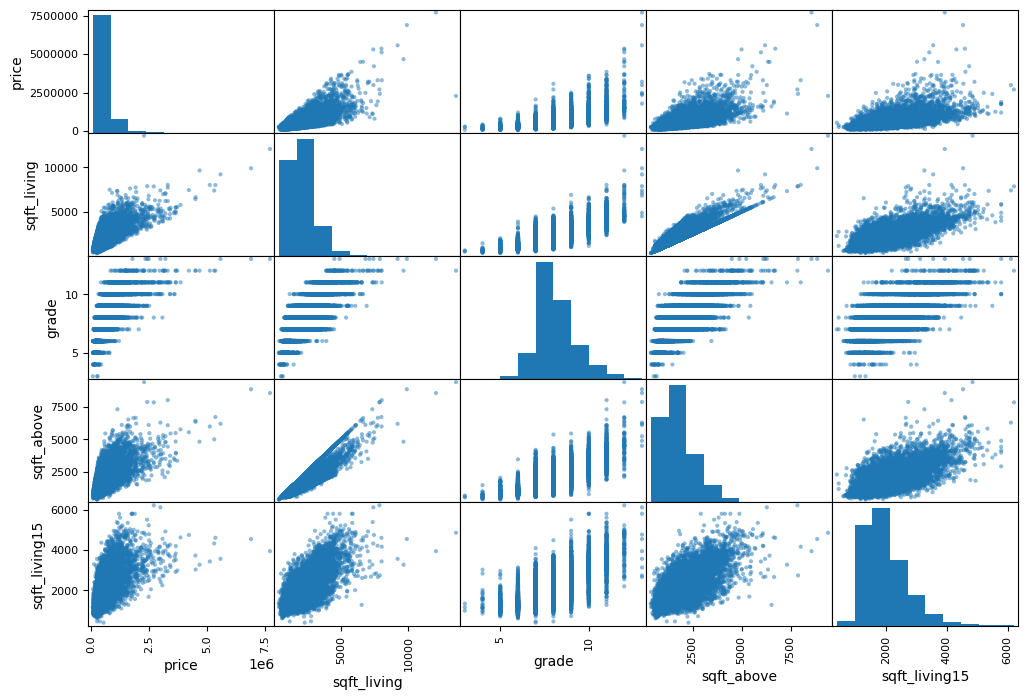

In [30]:
from pandas.plotting import scatter_matrix
attributes = ["price", "sqft_living", "grade",
"sqft_above", "sqft_living15"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

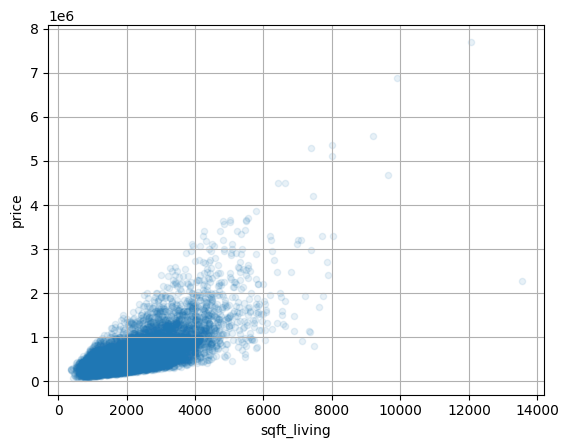

In [31]:
housing.plot(kind="scatter", x="sqft_living", y="price",
alpha=0.1, grid=True)
plt.show()

the correlation is indeed quite strong;
you can clearly see the upward trend

# Prepare the Data for Machine Learning Algorithms


Now Separate the labels and input features as we are working on a supervised learning task (specificaly linear regression)

In [32]:
housing = train_set.drop("price", axis=1)
housing_labels = train_set["price"].copy()

In [33]:
housing_labels

14673    499000.0
17260    500000.0
14553    365000.0
3554     277500.0
20241    790000.0
           ...   
9698     357000.0
7335     445500.0
17889    680000.0
8034     333000.0
19350    215000.0
Name: price, Length: 17289, dtype: float64

Clean the Data

In [34]:
from sklearn.impute import SimpleImputer
housing_num = housing.select_dtypes(include = [np.number])

# Step 1: Explicitly cast each column to float64 first
housing_num['sqft_basement'] = housing_num['sqft_basement'].astype('float64')
housing_num['yr_renovated'] = housing_num['yr_renovated'].astype('float64')

# Step 2: Replace 0 with NaN
housing_num.loc[:, ["sqft_basement", "yr_renovated"]] = housing_num.loc[:, ["sqft_basement", "yr_renovated"]].replace(0, np.nan)


imputer = SimpleImputer(strategy= "most_frequent")
imputer.fit(housing_num)

SimpleImputer(strategy='most_frequent')

In [35]:
X = imputer.transform(housing_num)

In [36]:
housing_tr = pd.DataFrame(X,columns= housing_num.columns,index = housing_num.index)

In [37]:
# Convert the relevant columns to int64 after imputation
columns_to_convert = ["bedrooms", "bathrooms", "floors", "waterfront", "view", "condition",
                       "grade", "sqft_above", "sqft_basement", "yr_built", "yr_renovated",
                       "zipcode"]

# Convert columns to integers
housing_tr[columns_to_convert] = housing_tr[columns_to_convert].astype('int64')

In [38]:
housing = housing.drop("date",axis = 1)

# Feature Scaling and Transformation to make sample predictions

In [42]:
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression

some_new_data = housing[["sqft_living"]].iloc[:5]

model = TransformedTargetRegressor(LinearRegression(),
                                   
transformer=StandardScaler())

model.fit(housing[["sqft_living"]], housing_labels)

sample_predictions = model.predict(some_new_data)

In [44]:
sample_predictions.round(2)

array([431565.92, 451172.57, 871315.08, 423163.07, 647239.07])

# Now through Transformation Pipelines


In [55]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer


attributes = [
    ['id', 'price'],
    ['bedrooms', 'bathrooms', 'sqft_living'],
    ['sqft_lot', 'floors', 'waterfront'],
    ['view', 'condition', 'grade'],
    ['sqft_above', 'sqft_basement', 'yr_built'],
    ['yr_renovated', 'zipcode', 'lat'],
    ['long', 'sqft_living15', 'sqft_lot15']
]


pipeline = make_pipeline(SimpleImputer(strategy = "median"),StandardScaler())

preprocessing = make_column_transformer(
(pipeline, make_column_selector(dtype_include=np.number)))

In [59]:
housing_prepared = preprocessing.fit_transform(housing_num)

# Select and Train a Model


1. Linear Regression

In [61]:
from sklearn.linear_model import LinearRegression
lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7b1b38568d60>)])),
                ('linearregression', LinearRegression())])

In [62]:
housing_predictions = lin_reg.predict(housing)
housing_predictions[:5].round(-2) # -2 = rounded to the nearest hundred

array([367400., 471300., 550000., 254800., 651900.])

In [67]:
housing_labels.iloc[:5].values

array([499000., 500000., 365000., 277500., 790000.])

Now check the differnce

In [68]:
from sklearn.metrics import mean_squared_error
lin_rmse = mean_squared_error(housing_labels, housing_predictions,
squared=False)
lin_rmse

201083.59514633485

# Model is Underfitting the data

It is a huge difference because the price ranges from 75,000 Dollars to 7,700,000 dollars 

Let's try another model which is Decision Tree Regressor

2. DcisionTree Regressor

In [69]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7b1b38568d60>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [70]:
housing_predictions = tree_reg.predict(housing)
tree_rmse = mean_squared_error(housing_labels, housing_predictions,
squared=False)
tree_rmse

8797.978687275356

Not a perfect one but looks alike a good difference let's try it out on our test set

# Try the best model on the test set

In [73]:
print(X_test.columns)  # To check if 'sqft_living' is in the columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [82]:
final_predictions = predictions.round(2)

for i, pred in enumerate(final_predictions[:5], start=1):
    print(f"Prediction of price for house No {i}: ${int(pred):,}")


Prediction of price for house No 1: $764,000
Prediction of price for house No 2: $305,000
Prediction of price for house No 3: $540,000
Prediction of price for house No 4: $341,500
Prediction of price for house No 5: $499,950


# Finally Display these predictions using matplotlib

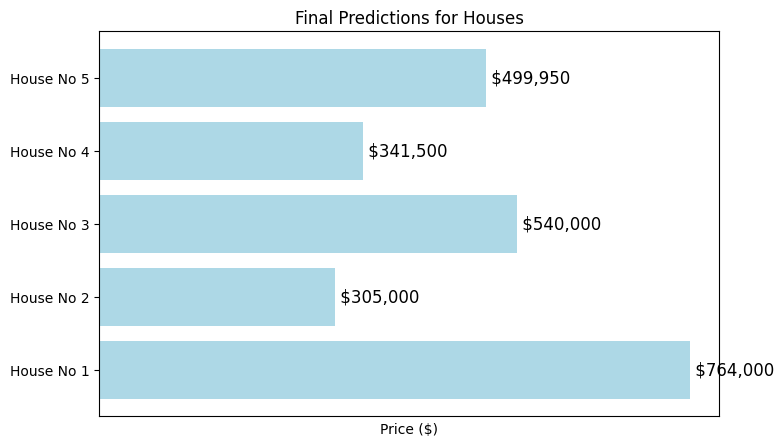

In [88]:
import matplotlib.pyplot as plt

# Sample final predictions
final_predictions = predictions.round(2)

# Get the first 5 predictions
house_numbers = [f'House No {i}' for i in range(1, 6)]
predicted_prices = [f"${int(pred):,}" for pred in final_predictions[:5]]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the predictions
ax.barh(house_numbers, final_predictions[:5], color='lightblue')

# Add labels
for i, v in enumerate(final_predictions[:5]):
    ax.text(v, i, f" {predicted_prices[i]}", va='center', fontsize=12)

ax.set_xlabel('Price ($)')
ax.set_title('Final Predictions for Houses')

# Remove x-axis labels for a cleaner look
ax.get_xaxis().set_ticks([])
plt.savefig('final_predictions.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()
